<a href="https://colab.research.google.com/github/sedrisella/Pemrograman-python/blob/main/Optical_caracter_Recognition(Task_9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optical caracter Recognition

In [1]:
pip install imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 76.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 62.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 17.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.7.0.72
    Uninstalling opencv-python-headless-4.7.0.72:
      Successfully uninstalled opencv-python-headless-4.7.0.72


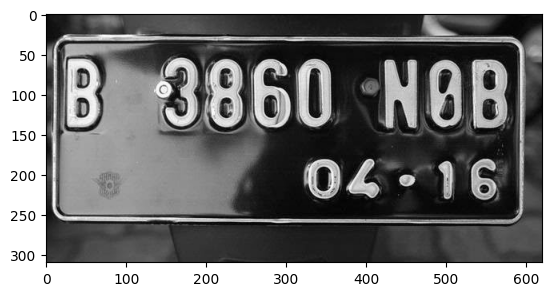

In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils
import easyocr

img = cv2.imread('Plat B.jpeg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))


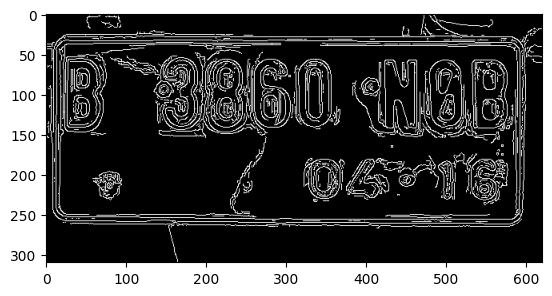

In [10]:
bfilter =cv2.bilateralFilter(gray,11,15,15)
edged=cv2.Canny(bfilter,20,80)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [11]:
#mendeteksi perubahan warna gambar dan menandai sebagai kontur
keypoints=cv2.findContours(edged.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
countours=imutils.grab_contours(keypoints)
countours=sorted(countours,key=cv2.contourArea,reverse=True)[:10]

In [12]:
location=None
for contour in countours:
  approx=cv2.approxPolyDP(contour,10,True)
  if len(approx)==4:
    location=approx
    break

In [13]:
location

array([[[535,  57]],

       [[534, 140]],

       [[571, 145]],

       [[575,  70]]], dtype=int32)

In [16]:
mask=np.zeros(gray.shape,np.uint8)
new_image=cv2.drawContours(mask,[location],0,255,-1)
new_image=cv2.bitwise_and(img,img,mask=mask)

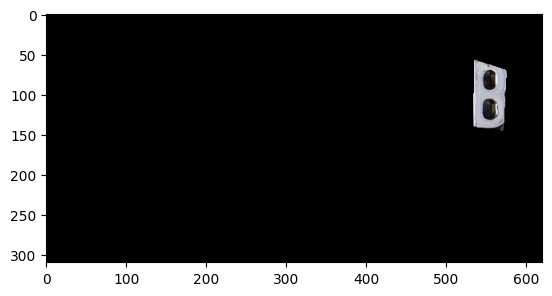

In [18]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [20]:
(x,y) = np.where(mask==255)
(x1,y1) = (np.min(x),np.min(y))
(x2,y2) = (np.max(x),np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]


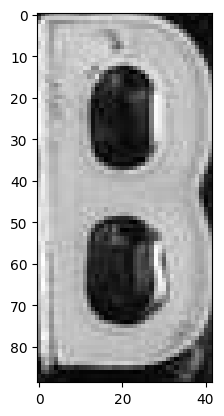

In [21]:
plt.imshow(cv2.cvtColor(cropped_image,cv2.COLOR_BGR2RGB))

In [22]:
reader =easyocr.Reader(['en'])
result=reader.readtext(cropped_image)
result

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[([[0, 0], [42, 0], [42, 89], [0, 89]], '8', 0.976042429281879)]

In [28]:
#DARI KONVERSI OCR TERDAPAT 1 LIST UNTUK MENGELIMINASI BILANGAN YANG TIDAK PENTING
#DAN HANYA MENGAMBIL VALUE HASIL OCR
text1=str.upper(result[0][1])



In [30]:
text1

'8'